In [1]:
from keras import models
from keras import layers
from keras import regularizers

model = models.Sequential()
model.add(layers.convolutional.Conv1D(6, 5,strides=1, padding='valid', input_shape=(200, 1), activation="relu", name="convolution_1d_layer1"))
model.add(layers.MaxPool1D(pool_size=2, strides=2, padding="valid", name="max_pooling_layer1"))

model.add(layers.convolutional.Conv1D(12, 5,strides=1, padding='valid', activation="relu", name="convolution_1d_layer2"))
model.add(layers.MaxPool1D(pool_size=2, strides=2, padding="valid", name="max_pooling_layer2"))

model.add(layers.convolutional.Conv1D(24, 4,strides=1, padding='valid', activation="relu", name="convolution_1d_layer3"))
model.add(layers.MaxPool1D(pool_size=2, strides=2, padding="valid", name="max_pooling_layer3"))

model.add(layers.convolutional.Conv1D(48, 5,strides=1, padding='valid',activation="relu", name="convolution_1d_layer4"))
model.add(layers.MaxPool1D(pool_size=2, strides=2, padding="valid", name="max_pooling_layer4"))

model.add(layers.convolutional.Conv1D(96, 4,strides=1, padding='valid', activation="relu", name="convolution_1d_layer5"))
model.add(layers.MaxPool1D(pool_size=1, strides=1, padding="valid", name="max_pooling_layer5"))


model.add(layers.Flatten())
model.add(layers.Dense(256, kernel_regularizer=regularizers.l2(0.001), activation='relu', name="fc1"))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(16,activation='softmax'))

Using TensorFlow backend.


In [2]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
convolution_1d_layer1 (Conv1 (None, 196, 6)            36        
_________________________________________________________________
max_pooling_layer1 (MaxPooli (None, 98, 6)             0         
_________________________________________________________________
convolution_1d_layer2 (Conv1 (None, 94, 12)            372       
_________________________________________________________________
max_pooling_layer2 (MaxPooli (None, 47, 12)            0         
_________________________________________________________________
convolution_1d_layer3 (Conv1 (None, 44, 24)            1176      
_________________________________________________________________
max_pooling_layer3 (MaxPooli (None, 22, 24)            0         
_________________________________________________________________
convolution_1d_layer4 (Conv1 (None, 18, 48)            5808      
__________

In [3]:
import numpy as np
import scipy.io as sio

def make_one_hot(data, num_label):
    return (np.arange(num_label) == data).astype(np.integer)

def MaxMinNormalization(matrix):
    Min = np.min(matrix)
    Max = np.max(matrix)
    mat_norm = (matrix - Min) / (Max - Min)
    return mat_norm

def get_files():
    dataset_path = 'data_sample_new.mat'
    data_mat = sio.matlab.loadmat(dataset_path)
    data_sample = np.array(data_mat['data'])  # read data from dict
    x_train = np.array(data_mat['x_train'])  # read x_train data from dict
    x_test = np.array(data_mat['x_test'])  # read x_test data from dict
    y_train = np.array(data_mat['y_train'])  # read y_train data from dict
    y_test = np.array(data_mat['y_test'])  # read y_test data from dict

    # 归一化
    x_train = MaxMinNormalization(x_train)
    x_test = MaxMinNormalization(x_test)
    # onehot
    y_train_onehot = make_one_hot(y_train, 16)
    y_test_onehot = make_one_hot(y_test, 16)

    print('x_train.shape',x_train.shape)
    print(x_train[0])
    print('y_train_onehot.shape',y_train_onehot.shape)
    print(y_train_onehot[0])

    return x_train, y_train_onehot, x_test, y_test_onehot

x_train, y_train_onehot, x_test, y_test_onehot = get_files()

x_train.shape (9224, 200)
[ 0.2951409   0.36402644  0.38455294  0.38837991  0.41760408  0.4496115
  0.45320654  0.43720283  0.43662299  0.40879044  0.40705091  0.40276006
  0.39765743  0.41702424  0.43105648  0.4321002   0.42444625  0.39997681
  0.38304534  0.37133248  0.36704163  0.36147512  0.35347327  0.3414125
  0.34407979  0.33167111  0.32030616  0.32065406  0.31821872  0.2966485
  0.33016352  0.28099269  0.32471298  0.38791604  0.41632842  0.43615911
  0.53102169  0.59167343  0.58332367  0.37666705  0.59816769  0.6018787
  0.57056709  0.56012989  0.51397425  0.46851444  0.49321582  0.54598168
  0.53078975  0.53809579  0.52615099  0.53229734  0.52093239  0.40797866
  0.38524875  0.37365186  0.3223936   0.15400673  0.16838687  0.19540763
  0.28516758  0.35358924  0.41226951  0.44392903  0.43314392  0.43407167
  0.42606981  0.42734547  0.42061927  0.41760408  0.39742549  0.39023542
  0.38350922  0.36333063  0.30453438  0.22671924  0.09115157  0.07398817
  0.10553172  0.09149948  0.1

In [4]:
from keras import optimizers
#模型编译
model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [5]:
x_train = np.reshape(x_train ,[-1,200,1])
x_test = np.reshape(x_test ,[-1,200,1])

history = model.fit(x_train,
                    y_train_onehot,
                    epochs=200,
                    batch_size=128,
                    validation_data=(x_test, y_test_onehot))


Train on 9224 samples, validate on 1025 samples
Epoch 1/200
9224/9224 [==============================] - 3s - loss: 2.4444 - acc: 0.2309 - val_loss: 2.6055 - val_acc: 0.2166
Epoch 2/200
9224/9224 [==============================] - 1s - loss: 2.2251 - acc: 0.2301 - val_loss: 2.3878 - val_acc: 0.2166
Epoch 3/200
9224/9224 [==============================] - 1s - loss: 2.1692 - acc: 0.2386 - val_loss: 2.4371 - val_acc: 0.2185
Epoch 4/200
9224/9224 [==============================] - 1s - loss: 2.1350 - acc: 0.2482 - val_loss: 2.2323 - val_acc: 0.2420
Epoch 5/200
9224/9224 [==============================] - 1s - loss: 2.1041 - acc: 0.2600 - val_loss: 2.2756 - val_acc: 0.2244
Epoch 6/200
9224/9224 [==============================] - 1s - loss: 2.0922 - acc: 0.2583 - val_loss: 2.1509 - val_acc: 0.2068
Epoch 7/200
9224/9224 [==============================] - 1s - loss: 2.0644 - acc: 0.2723 - val_loss: 2.0687 - val_acc: 0.2820
Epoch 8/200
9224/9224 [==============================] - 1s - loss: 2.

9224/9224 [==============================] - 1s - loss: 1.5830 - acc: 0.4290 - val_loss: 3.1358 - val_acc: 0.2839
Epoch 65/200
9224/9224 [==============================] - 1s - loss: 1.5711 - acc: 0.4356 - val_loss: 2.1667 - val_acc: 0.3093
Epoch 66/200
9224/9224 [==============================] - 1s - loss: 1.5771 - acc: 0.4283 - val_loss: 2.7815 - val_acc: 0.3122
Epoch 67/200
9224/9224 [==============================] - 1s - loss: 1.5650 - acc: 0.4383 - val_loss: 2.6193 - val_acc: 0.2576
Epoch 68/200
9224/9224 [==============================] - 1s - loss: 1.5686 - acc: 0.4350 - val_loss: 2.1368 - val_acc: 0.3434
Epoch 69/200
9224/9224 [==============================] - 1s - loss: 1.5758 - acc: 0.4326 - val_loss: 2.4925 - val_acc: 0.3034
Epoch 70/200
9224/9224 [==============================] - 1s - loss: 1.5556 - acc: 0.4397 - val_loss: 2.1466 - val_acc: 0.3171
Epoch 71/200
9224/9224 [==============================] - 1s - loss: 1.5530 - acc: 0.4412 - val_loss: 2.3667 - val_acc: 0.33

9224/9224 [==============================] - 1s - loss: 1.3937 - acc: 0.5082 - val_loss: 3.4458 - val_acc: 0.2995
Epoch 129/200
9224/9224 [==============================] - 1s - loss: 1.3964 - acc: 0.5077 - val_loss: 1.6834 - val_acc: 0.4224
Epoch 130/200
9224/9224 [==============================] - 1s - loss: 1.4000 - acc: 0.5080 - val_loss: 4.3833 - val_acc: 0.3034
Epoch 131/200
9224/9224 [==============================] - 1s - loss: 1.4023 - acc: 0.4989 - val_loss: 3.5121 - val_acc: 0.2937
Epoch 132/200
9224/9224 [==============================] - 1s - loss: 1.3882 - acc: 0.5038 - val_loss: 1.6511 - val_acc: 0.4098
Epoch 133/200
9224/9224 [==============================] - 1s - loss: 1.3909 - acc: 0.5036 - val_loss: 3.0389 - val_acc: 0.3522
Epoch 134/200
9224/9224 [==============================] - 1s - loss: 1.3911 - acc: 0.5069 - val_loss: 3.5134 - val_acc: 0.2956
Epoch 135/200
9224/9224 [==============================] - 1s - loss: 1.3849 - acc: 0.5086 - val_loss: 4.3072 - val_ac

9224/9224 [==============================] - 2s - loss: 1.3050 - acc: 0.5489 - val_loss: 2.8089 - val_acc: 0.3424
Epoch 193/200
9224/9224 [==============================] - 2s - loss: 1.3194 - acc: 0.5412 - val_loss: 3.4558 - val_acc: 0.3161
Epoch 194/200
9224/9224 [==============================] - 1s - loss: 1.3128 - acc: 0.5434 - val_loss: 4.1267 - val_acc: 0.3298
Epoch 195/200
9224/9224 [==============================] - 1s - loss: 1.3042 - acc: 0.5525 - val_loss: 4.8690 - val_acc: 0.3044
Epoch 196/200
9224/9224 [==============================] - 1s - loss: 1.3227 - acc: 0.5424 - val_loss: 3.7670 - val_acc: 0.3434
Epoch 197/200
9224/9224 [==============================] - 1s - loss: 1.3116 - acc: 0.5427 - val_loss: 2.4154 - val_acc: 0.3688
Epoch 198/200
9224/9224 [==============================] - 1s - loss: 1.3044 - acc: 0.5410 - val_loss: 5.0312 - val_acc: 0.2937
Epoch 199/200
9224/9224 [==============================] - 1s - loss: 1.3240 - acc: 0.5377 - val_loss: 3.3595 - val_ac

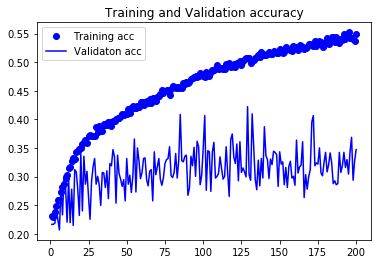

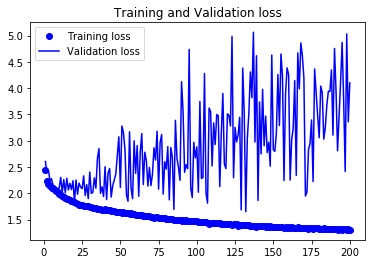

In [7]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validaton acc')
plt.title('Training and Validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

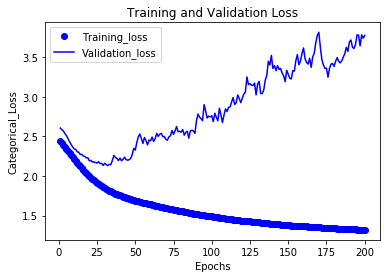

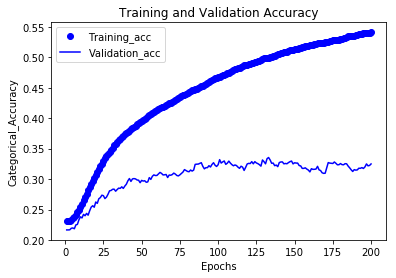

In [8]:
#之后波动过大，采用滑动均值模型得到光滑曲线继续观测
def smooth_curve(points, factor=0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

smooth_loss = smooth_curve(loss)
smooth_val_loss = smooth_curve(val_loss)

plt.plot(range(1, len(smooth_loss) + 1), smooth_loss, 'bo',label='Training_loss')
plt.plot(range(1, len(smooth_val_loss) + 1), smooth_val_loss, 'b',label='Validation_loss')
plt.xlabel('Epochs')
plt.ylabel('Categorical_Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.figure()

smooth_acc = smooth_curve(acc)
smooth_val_acc = smooth_curve(val_acc)

plt.plot(range(1, len(smooth_acc) + 1), smooth_acc, 'bo',label='Training_acc')
plt.plot(range(1, len(smooth_val_acc) + 1), smooth_val_acc, 'b',label='Validation_acc')
plt.xlabel('Epochs')
plt.ylabel('Categorical_Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.show()

In [5]:
x_train = np.reshape(x_train ,[-1,200,1])
x_test = np.reshape(x_test ,[-1,200,1])
#75轮后过拟合
history = model.fit(x_train,
                    y_train_onehot,
                    epochs=75,
                    batch_size=128,
                    validation_data=(x_test, y_test_onehot))


Train on 9224 samples, validate on 1025 samples
Epoch 1/75
9224/9224 [==============================] - 1s - loss: 2.3561 - acc: 0.2270 - val_loss: 2.3173 - val_acc: 0.2166
Epoch 2/75
9224/9224 [==============================] - 1s - loss: 2.2958 - acc: 0.2382 - val_loss: 2.2870 - val_acc: 0.2166
Epoch 3/75
9224/9224 [==============================] - 1s - loss: 2.2307 - acc: 0.2371 - val_loss: 2.2213 - val_acc: 0.2000
Epoch 4/75
9224/9224 [==============================] - 1s - loss: 2.1684 - acc: 0.2340 - val_loss: 2.3161 - val_acc: 0.2166
Epoch 5/75
9224/9224 [==============================] - 1s - loss: 2.1394 - acc: 0.2387 - val_loss: 2.1674 - val_acc: 0.2420
Epoch 6/75
9224/9224 [==============================] - 1s - loss: 2.1159 - acc: 0.2458 - val_loss: 2.2638 - val_acc: 0.2166
Epoch 7/75
9224/9224 [==============================] - ETA: 0s - loss: 2.0964 - acc: 0.250 - 1s - loss: 2.0987 - acc: 0.2499 - val_loss: 2.1408 - val_acc: 0.2273
Epoch 8/75
9224/9224 [=================

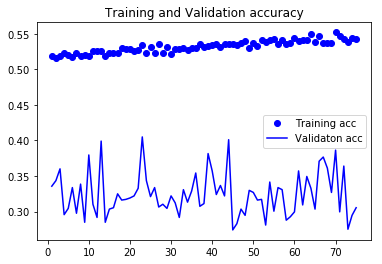

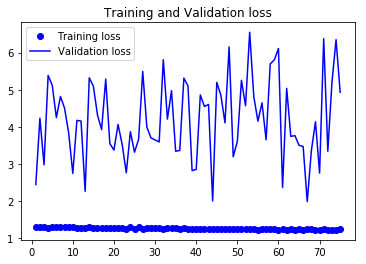

In [10]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validaton acc')
plt.title('Training and Validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

In [6]:
model.save('Use_Rmsprop.h5')